### 1. Perceptron Algorithm

Here, I have implemented the simplest perceptron model for classification. I have used a relu activation function for this purpose.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [55]:
with open('Xlin_sep.npy', 'rb') as f:
    X = np.load(f)
with open('ylin_sep.npy','rb') as f:
    y = np.load(f)
X_train = X[:150]
y_train = y[:150]
X_test = X[150:]
y_test = y[150:]

In [56]:
def activation(x):
    if x>0:
        return 1
    else:
        return -1

As the input has two features, we take these as the input for the perceptron. For each input, I have declared a weight. In order to update the weights, I find the error of the new prediction and it they are not the same, then I simply multiply the learning rate 'mu' and the input.

In [57]:
def perceptron(X,y,mu):
    w = np.zeros((X.shape[1]))
    it = []
    weights = []
    for _ in range(50):
        for i in range(len(X)):
            weights.append(w)
            pred = w[0]*X[i,0]+w[1]*X[i,1]
            y_hat = activation(pred)
            diff = y[i]-y_hat
            if(diff != 0):
                w += mu*diff*X[i]
    return w

In [58]:
def prediction(x,w):
    y_hat = []
    pred = np.dot(x,w)
    for i in pred:
        y_hat.append(activation(i))
    return y_hat

In [59]:
def accuracy(y,y_pred):
    correct = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y)) * 100.0

In [60]:
weights = perceptron(X_train,y_train,0.3)
acc_test = accuracy(y_test,prediction(X_test,weights))
acc_train = accuracy(y_train,prediction(X_train,weights))
print("Train Accuracy: ",acc_train)
print("Test Accuracy: ",acc_test)

Train Accuracy:  100.0
Test Accuracy:  98.0


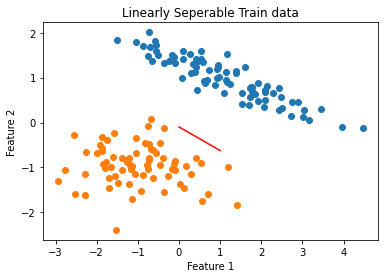

In [61]:
plt.scatter(X_train[:,0][y_train==-1],X_train[:,1][y_train==-1])
plt.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1])
plt.title("Linearly Seperable Train data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.plot(weights,color='r')

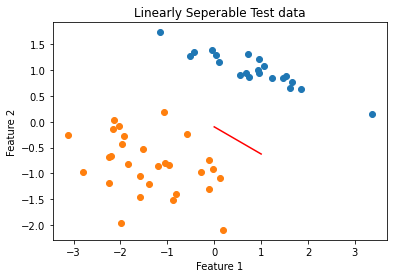

In [62]:
plt.scatter(X_test[:,0][y_test==-1],X_test[:,1][y_test==-1])
plt.scatter(X_test[:,0][y_test==1],X_test[:,1][y_test==1])
plt.title("Linearly Seperable Test data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.plot(weights,color='r')

For non-linear data, I have used a different activation function. It is known that ReLU is not very effective for nnon-linearly seperable data, I have used sigmoid function which is a widely used function for this task. Rest of the method is the same as before.

In [63]:
with open('Xlinnoise_sep.npy', 'rb') as f:
    X1 = np.load(f)
with open('ylinnoise_sep.npy','rb') as f:
    y1 = np.load(f)
X_train_1 = X1[:150]
y_train_1 = y1[:150]
X_test_1 = X1[150:]
y_test_1 = y1[150:]

In [64]:
def activation_nonlin(x):
    z = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    if z>0.5:
        return 1
    else:
        return -1

In [65]:
def perceptron_nonlin(X,y,mu):
    w = np.zeros((X.shape[1]))
    y_hat = np.zeros(len(y))
    it = []
    weights = []
    for _ in range(50):
        for i in range(len(X)):
            weights.append(w)
            pred = w[0]*X[i,0]+w[1]*X[i,1]
            y_hat = activation_nonlin(pred)
            diff = y[i]-y_hat
            if(diff != 0):
                w += mu*diff*X[i]
    return w

In [68]:
weights = perceptron_nonlin(X_train_1,y_train_1,0.001)
y_pred = prediction(X_test_1,weights)
acc_test = accuracy(y_test_1,prediction(X_test_1,weights))
print("Test Accuracy: ",acc_test)

Test Accuracy:  80.0


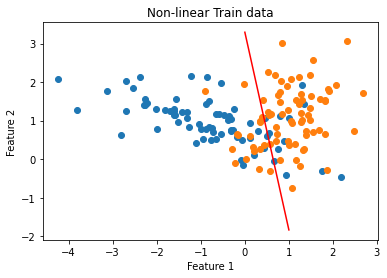

In [69]:
plt.scatter(X_train_1[:,0][y_train_1==-1],X_train_1[:,1][y_train_1==-1])
plt.scatter(X_train_1[:,0][y_train_1==1],X_train_1[:,1][y_train_1==1])
plt.title("Non-linear Train data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.plot(weights,color='r')

I wasnt quite sure about how to deal with this kind of data. But when taking a look at https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ post, I realised that using the polynomial features could handle such a circular data. For the polynomial feature, I have used the multiplication of two features, the power and also the square.

In [71]:
with open('circles_x.npy', 'rb') as f:
    X2 = np.load(f)
with open('circles_y.npy','rb') as f:
    y2 = np.load(f)

In [72]:
col1 = []
col2 = []
col3 = []
col4 = []

for i,j in zip(X2[:,0],X2[:,1]):
    mul = i*j
    powe = np.power(i,j)
    pol1 = i**2
    pol2 = j**2
    col1.append([mul])
    col2.append([powe])
    col3.append([pol1])
    col4.append([pol2])
X2 = np.append(X2,col1,axis=1)
X2 = np.append(X2,col2,axis=1)
X2 = np.append(X2,col3,axis=1)
X2 = np.append(X2,col4,axis=1)
X2.shape

(200, 6)

In [77]:
X_train_2 = X2[:150]
y_train_2 = y2[:150]
X_test_2 = X2[150:]
y_test_2 = y2[150:]
X_train_2.shape

(150, 6)

In [83]:
def perceptron_poly(X,y,mu):
    w = np.zeros((X.shape[1]))
    y_hat = np.zeros(len(y))
    it = []
    weights = []
    for _ in range(50):
        for i in range(len(X)):
            weights.append(w)
            pred = w[0]*X[i,0]+w[1]*X[i,1]+w[2]*X[i,2]+w[3]*X[i,3]+w[4]*X[i,4]+w[5]*X[i,5]
            y_hat = activation_nonlin(pred)
            diff = y[i]-y_hat
            if(diff != 0):
                w += mu*diff*X[i]
    return w
def pred_poly(X,w):
    y_hat = []
    pred = np.dot(X,w)
    for i in pred:
        y_hat.append(activation(i))
    return y_hat

In [84]:
weights_circ = perceptron_poly(X_train_2,y_train_2,0.01)
acc_test = accuracy(y_test_2,pred_poly(X_test_2,weights_circ))
print("Test Accuracy: ",acc_test)

Test Accuracy:  60.0


I couldn't get the required graphs.

### 2. Feed-Forward Neural Network.

In [23]:
from sklearn.datasets import load_digits

Define a class for Neural Network which contains the weights, biases and the no of layers are not predefined as required by the exercise. I have used tanh activation function and cross entropy as my loss function for training. I have taken some of the idea for the model from https://medium.com/@ethan.stone/building-a-neural-network-from-scratch-part-1-feedforward-47f7c35a971f. I have calculated the derivative of the cost function inside the function but others are calculated inside the back propagation function.

In [143]:
class NN():
    def __init__(self,layers):
        '''
        nlayers: number of layers in the neural network
        weights: are the weights of the network whcih are randomly generated from a normal distribution
        dotoutput: is the output from the dot product of weights and the input. 
        I saved this as it could be useful during feedforward and back propagation.
        activations: are the output after the activation function is applied to the dot values
        '''
        self.nlayers = len(layers)
        self.weights = [np.random.randn(next_layer,current_layer) for current_layer,next_layer in zip(layers[:-1], layers[1:])]
        self.dotoutput = []
        self.activations = []
        
    def fit(self,X,y,mu=0.01):
        epochs = 20
        for i in range(epochs):
            print("Epoch: ",i+1,"/",epochs)
            self.ffnn(X.T)
            self.backprop(self.activations[-1],y,mu)

    def tanh(self,x):
        z = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
        return z
    def soft_max(self,x):
        return (np.exp(x-max(x))/np.sum(np.exp(x-max(x))))
    def loss_func(self,y,y_hat):
        loss = (1/len(y_hat))*np.sum(-(y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))
        return loss
    def predict(self,X):
        self.ffnn(X.T)
        return self.activations[-1]
    
    def der_dotout(self,y,y_hat):
        dev = ((1-y)/1-y_hat)-(y/y_hat)
        return dev
    def der_tanh(self,x):
        dev = 1.0-(self.tanh(x))**2
        return dev
        
    def ffnn(self,X):
        ac = X
        self.activations = [X]
        #on = np.ones((X.shape[0],1))
        #self.weights = append(self.weights,on,axis=1)
        for l in range(self.nlayers-1):
            dotout = np.dot(self.weights[l],ac)
            self.dotoutput.append(dotout)
            if(l==self.nlayers-1):
                ac = loss_func()
            else:
                ac = self.tanh(dotout)
            self.activations.append(ac)
            
    def backprop(self,y_hat,y,mu):
        n = len(y_hat)
        der_costout = self.der_dotout(y,y_hat)
        for l in reversed(range(self.nlayers-1)):
            der_dot = np.multiply(der_costout,self.der_tanh(self.dotoutput[l]))
            der_weights = np.dot(der_dot,self.activations[l].T)
            der_costout = np.dot(self.weights[l].T,der_costout)
            self.weights[l] = self.weights[l] - mu*der_weights

In [148]:
mnist = load_digits()
X = mnist['data']
y = mnist['target']
part = int(0.8*len(X))
on = np.ones((X.shape[0],1))
X = np.append(X,on,axis=1)
X_train = X[:part]
y_train = y[:part]
X_test = X[part:]
y_test = y[part:]

In [145]:
no_x = X_train.shape[1]
nn = NN([no_x,128,64,32,10])
nn.fit(X_train,y_train)

Epoch:  1 / 20
Epoch:  2 / 20
Epoch:  3 / 20
Epoch:  4 / 20
Epoch:  5 / 20
Epoch:  6 / 20
Epoch:  7 / 20
Epoch:  8 / 20
Epoch:  9 / 20
Epoch:  10 / 20
Epoch:  11 / 20
Epoch:  12 / 20
Epoch:  13 / 20
Epoch:  14 / 20
Epoch:  15 / 20
Epoch:  16 / 20
Epoch:  17 / 20
Epoch:  18 / 20
Epoch:  19 / 20
Epoch:  20 / 20


### 3. MLP using sklearn

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

In [29]:
param_mlp = {
    'hidden_layer_sizes': [(64,32,16),(32,16),(64,16,8,4,2),(32,8,4)],
    'activation': ['identity', 'logistic','tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
    'learning_rate': ['constant','adaptive','invscaling']
}
clf = MLPClassifier()
random_MLP = RandomizedSearchCV(clf,param_mlp,cv=5)
best_model = random_MLP.fit(X_train,y_train)

In [768]:
print("Best estimator is: ",best_model.best_estimator_)
prediction = best_model.predict(X_test)
print("The accuracy: ",accuracy_score(y_test,prediction))

Best estimator is:  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64, 32, 16),
              learning_rate='adaptive')
The accuracy:  0.9027777777777778
